In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import pandas as pd
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

## Looking at the data

After we load the data, we print the shape of the data and a pixelated digit.

We also show what the features of one example looks like.

The neural net will learn to estimate which digit these pixels represent.

In [174]:
# TODO: Turn this into a fuction so we can do many stocks quickly

msft= pd.read_csv('msft.csv')
print(msft.head)

# Create New Feature 'Days Since Start' for temporal data
start_date = datetime.strptime(msft.values[0,1], "%Y-%m-%d")
days_since = np.zeros(msft.values.shape[0])

for i in range(len(days_since)):
    curr_date = datetime.strptime(msft.values[i,1], "%Y-%m-%d")
    diff = curr_date - start_date
    
    
    days_since[i] = diff.days

print(days_since)

X = np.hstack((np.hstack((msft.values[:,2:6],msft.values[:,7:])), days_since.reshape(-1,1)))
msft_date = msft.values[:,1]

# Target is close_adj
y = msft.values[:,6]
print(X)
print(X.shape)
print(msft_date)
print(y)

<bound method NDFrame.head of      symbol    date_obs  open_pr  high_pr   low_pr  close_pr  close_adj  \
0      MSFT  2016-11-16   58.940   59.660   58.810     59.65    58.3529   
1      MSFT  2016-11-17   60.410   60.950   59.965     60.64    59.3213   
2      MSFT  2016-11-18   60.780   61.140   60.300     60.35    59.0376   
3      MSFT  2016-11-21   60.500   60.970   60.420     60.86    59.5365   
4      MSFT  2016-11-22   60.980   61.260   60.805     61.12    59.7909   
...     ...         ...      ...      ...      ...       ...        ...   
1144   MSFT  2021-06-07  249.980  254.090  249.810    253.81   253.8100   
1145   MSFT  2021-06-08  255.160  256.010  252.510    252.57   252.5700   
1146   MSFT  2021-06-09  253.810  255.530  253.210    253.59   253.5900   
1147   MSFT  2021-06-10  254.290  257.460  253.670    257.24   257.2400   
1148   MSFT  2021-06-11  257.985  258.487  256.610    257.89   257.8900   

        volume  split_coeff  
0     27332475            1  
1     321

## 1) Train Test Split


In [175]:
#Split the data into training and test set.  Train on first 80%, test and see results on last 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_test)

[[209.56 211.33 205.03 ... 32248893 1 1337.0]
 [205.4 205.7 202.31 ... 29940718 1 1338.0]
 [204.47 205.04 201.39 ... 31636070 1 1339.0]
 ...
 [253.81 255.53 253.21 ... 17937634 1 1666.0]
 [254.29 257.46 253.67 ... 24563619 1 1667.0]
 [257.985 258.487 256.61 ... 18999731 1 1668.0]]


## 2) Scale


In [176]:
# I read somewhere that it is important to scale the test data off of the training data. Something about assuming same parameters idk
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled) # Looking the new features after scaling
print(X_test_scaled)

[[-1.39858502 -1.38655508 -1.39304743 ... -0.06812608  0.
  -1.73443655]
 [-1.35882573 -1.35217714 -1.36132082 ...  0.28284549  0.
  -1.73184153]
 [-1.34881829 -1.34711372 -1.35211873 ... -0.04225528  0.
  -1.72924652]
 ...
 [ 2.78506602  2.72867049  2.78964652 ... -0.18063395  0.
   1.72212505]
 [ 2.80832655  2.77450774  2.66383882 ...  0.72176261  0.
   1.72991009]
 [ 2.58248297  2.58929328  2.5410527  ...  0.68244892  0.
   1.73250511]]
[[ 2.67525464  2.65538419  2.62345949 ...  0.29133892  0.
   1.73510013]
 [ 2.56273856  2.50534715  2.548744   ...  0.12257619  0.
   1.73769514]
 [ 2.53758472  2.48775844  2.52347258 ...  0.24653223  0.
   1.74029016]
 ...
 [ 3.87209042  3.83329489  3.94691253 ... -0.75503197  0.
   2.58886046]
 [ 3.88507305  3.88472855  3.95954824 ... -0.2705716   0.
   2.59145548]
 [ 3.98501222  3.91209765  4.04030689 ... -0.67737651  0.
   2.59405049]]


In [177]:
print(y_test)

[208.04 203.92 202.88 211.6 208.75 211.75 202.54 201.3 203.85 202.02
 204.06 203.9 205.01 216.54 213.29 212.94 216.35 212.48 208.25 203.38
 209.19 208.7 208.9 209.77 210.977 209.7 214.58 213.02 213.69 216.47
 221.15 226.58 228.91 225.53 227.27 231.65 217.3 214.25 202.66 211.29
 205.37 204.03 205.41 208.78 205.05 202.91 200.39 202.54 207.42 200.59
 203.19 207.82 209.44 207.26 210.33 212.46 206.19 210.38 205.91 209.83
 210.58 215.81 221.4 222.86 220.86 219.66 219.66 214.22 214.65 214.8
 214.89 216.23 210.08 213.25 202.68 204.72 202.47 202.33 206.43 216.39
 223.29 223.72 218.39 211.01 216.55 215.44 216.51 216.655 213.893 211.08
 212.42 210.39 210.11 213.86 213.87 215.23 214.07 216.21 215.37 214.24
 214.36 214.29 216.01 211.8 210.52 213.26 214.2 214.13 219.28 219.42
 218.59 222.59 223.94 221.02 222.75 224.96 224.15 221.68 222.42 217.69
 217.9 212.25 218.29 219.62 217.49 214.93 216.34 213.02 212.65 216.44
 224.34 224.97 225.95 229.53 232.33 232.9 238.93 231.96 239.65 239.51
 243.0 242.01 24

## 4) Creating the neural network

### The activation function and its derivative

We will use the sigmoid activation function:  $f(z)=\frac{1}{1+e^{-z}}$

The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 

In [178]:
def f(z):
    """ # ReLU
    new = z
    for i in range(len(new)):
        new[i] = max(0,new[i])
    return new"""
    
    return 1 / (1 + np.exp(-z.astype(float)))


def f_deriv(z):
    """# ReLU
    new = z
    for i in range(len(new)):
        if new[i] < 0:
            new[i] = 0
        else:
            new[i] = 1
    return new"""

    return f(z) * (1 - f(z))

### Creating and initialing W and b
We want the weights in W to be different so that during back propagation the nodes on a level will have different gradients and thus have different update values.

We want the  weights to be small values, since the sigmoid is almost "flat" for large inputs.

Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  The code assumes that the number of neurons in each level is in the python list *nn_structure*.

In the code, the weights, $W^{(\ell)}$ and $b^{(\ell)}$ are held in a python dictionary

In [179]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

### Initializing $\triangledown W$ and $\triangledown b$
Creating $\triangledown W^{(\ell)}$ and $\triangledown b^{(\ell)}$ to have the same size as $W^{(\ell)}$ and $b^{(\ell)}$, and setting $\triangledown W^{(\ell)}$, and  $\triangledown b^{(\ell)}$ to zero

In [180]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]),dtype='float64')
        tri_b[l] = np.zeros((nn_structure[l],),dtype='float64')
    return tri_W, tri_b

## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [181]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        if l == len(W):
            node_in = a[l]
            z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
            a[l+1] = z[l+1]
        else:
            node_in = a[l]
            z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
            a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

## Compute $\delta$
The code below compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  

If we wanted to have a different cost function, we would change the "calculate_out_layer_delta" function.


In [182]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

## The Back Propagation Algorithm


In [183]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = a[n_layers]
    return y

## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [184]:
nn_structure = [7, 4, 2, 1]
    
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, 1500)

Starting gradient descent for 1500 iterations
Iteration 0 of 1500
Iteration 1000 of 1500


### Plotting the learning curve


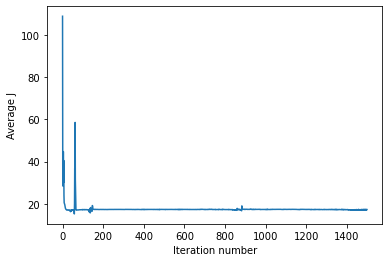

In [185]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

## 5) Assessing accuracy
Next we determine what percentage the neural network correctly predicted the handwritten digit correctly on the test set

In [186]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print(y_pred)

<ipython-input-178-41fd3dfa12c7>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z.astype(float)))


ValueError: setting an array element with a sequence.